## Neural Networks with scikit / sklearn

### Introduction

<img width="60%" class="imgright" src="../images/scikit.webp" srcset="../images/scikit_800w.webp 800w,../images/scikit_700w.webp 700w,../images/scikit_600w.webp 600w,../images/scikit_500w.webp 500w,../images/scikit_400w.webp 400w,../images/scikit_350w.webp 350w,../images/scikit_300w.webp 300w" alt="image symbolizing scikit" />

In the previous chapters of our tutorial, we manually created Neural Networks. This was necessary to get a deep understanding of how Neural networks can be implemented. This understanding is very useful to use the classifiers provided by the `sklearn` module of Python. In this chapter we will use the multilayer perceptron classifier  `MLPClassifier` contained in `sklearn.neural_network`


We will use again the Iris dataset, which we had used already multiple times in our Machine Learning tutorial with Python, to introduce this classifier.


### MLPClassifier classifier

We will continue with examples using the multilayer perceptron (MLP). 
The multilayer perceptron (MLP) is a feedforward artificial neural network model that maps sets of input data onto a set of appropriate outputs. An MLP consists of multiple layers
and each layer is fully connected to the following one.
The nodes of the layers are neurons using nonlinear activation functions, except for the nodes of the input layer. There can be one or more non-linear hidden layers between the input and the output layer. 



#### Multilabel Example



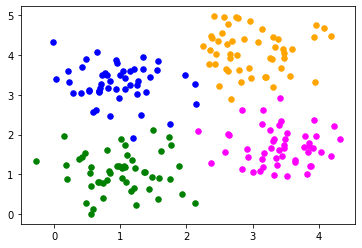

In [88]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_samples = 200
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
data, labels = make_blobs(n_samples=n_samples, 
                          centers=blob_centers, 
                          cluster_std=0.5,
                          random_state=0)


colours = ('green', 'orange', "blue", "magenta")
fig, ax = plt.subplots()

for n_class in range(len(blob_centers)):
    ax.scatter(data[labels==n_class][:, 0], 
               data[labels==n_class][:, 1], 
               c=colours[n_class], 
               s=30, 
               label=str(n_class))

In [96]:
from sklearn.model_selection import train_test_split
datasets = train_test_split(data, 
                            labels,
                            test_size=0.2)

train_data, test_data, train_labels, test_labels = datasets

We will create now a `MLPClassifier`. 

A few notes on the used parameters:

- hidden_layer_sizes: tuple, length = n_layers - 2, default=(100,)  
The ith element represents the number of neurons in the ith
hidden layer.  
`(6,)` means one hidden layer with 6 neurons
- solver:  
The weight optimization can be influenced with the `solver` parameter.
Three solver modes are available

  * 'lbfgs'  
    is an optimizer in the family of quasi-Newton methods.
  * 'sgd'  
    refers to stochastic gradient descent.
  * 'adam'
    refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba
  
  Without understanding in the details of the solvers, you should know the following: 
'adam' works pretty well -  both training time and validation score - on relatively large datasets, i.e. thousands of training samples or more. 
For small datasets, however, 'lbfgs' can converge faster and perform better.

- 'alpha'  
This parameter can be used to control possible 'overfitting' and 'underfitting'. We will cover it in detail further down in this chapter.

In [101]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5,
                    hidden_layer_sizes=(6,), 
                    random_state=1)

clf.fit(train_data, train_labels)     

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(6,), random_state=1,
              solver='lbfgs')

In [102]:
clf.score(train_data, train_labels)

1.0

In [103]:
from sklearn.metrics import accuracy_score

predictions_train = clf.predict(train_data)
predictions_test = clf.predict(test_data)
train_score = accuracy_score(predictions_train, train_labels)
print("score on train data: ", train_score)
test_score = accuracy_score(predictions_test, test_labels)
print("score on train data: ", test_score)

score on train data:  1.0
score on train data:  0.95


In [104]:
predictions_train[:20]

array([2, 0, 1, 0, 2, 1, 3, 0, 3, 0, 2, 2, 1, 1, 0, 0, 1, 2, 2, 3])

### Multi-layer Perceptron



In [29]:
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [0., 1.], [1., 0.], [1., 1.]]
y = [0, 0, 0, 1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

print(clf.fit(X, y))                         

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')


The following diagram depicts the neural network, that we have trained for our classifier clf. We have two input nodes $X_0$ and $X_1$, called the input layer, and one output neuron 'Out'. We have two hidden layers the first one with the neurons $H_{00}$ ... $H_{04}$ and the second hidden layer consisting of $H_{10}$ and $H_{11}$.
Each neuron of the hidden layers and the output neuron possesses a corresponding Bias, i.e. 
$B_{00}$ is the corresponding Bias to the neuron $H_{00}$, $B_{01}$ is the corresponding Bias to the neuron $H_{01}$ and so on. 

Each neuron of the hidden layers receives the output from every neuron of the previous layers and transforms these values with a weighted linear summation
$$\sum_{i=0}^{n-1}w_ix_i = w_0x_0 + w_1x_1 + ... + w_{n-1}x_{n-1}$$
into an output value, where n is the number of neurons of the layer and $w_i$ corresponds to the i<sup>th</sup> component of the weight vector.
The output layer receives the values from the last hidden layer. It also performs a linear summation, but a non-linear activation function 
$$g(\cdot):R \rightarrow R$$
like the hyperbolic tan function will be applied to the summation result. 

<img width="60%" class="imgright" src="../images/mlp_example_layer.webp" srcset="../images/mlp_example_layer_800w.webp 800w,../images/mlp_example_layer_700w.webp 700w,../images/mlp_example_layer_600w.webp 600w,../images/mlp_example_layer_500w.webp 500w,../images/mlp_example_layer_400w.webp 400w,../images/mlp_example_layer_350w.webp 350w,../images/mlp_example_layer_300w.webp 300w" alt="neural network layer structure" />

The attribute coefs_ contains a list of weight matrices for every layer. The weight matrix at index i holds the weights between the layer i and layer i + 1.

In [ ]:
print("weights between input and first hidden layer:")
print(clf.coefs_[0])
print("\nweights between first hidden and second hidden layer:")
print(clf.coefs_[1])

The summation formula of the neuron H<sub>00</sub> is defined by:

$$\sum_{i=0}^{n-1}w_ix_i = w_0x_0 + w_1x_1 + w_{B_{11}} * B_{11}$$

which can be written as

$$\sum_{i=0}^{n-1}w_ix_i = w_0x_0 + w_1x_1 + w_{B_{11}}$$
because $B_{11} = 1$.

We can get the values for $w_0$ and $w_1$ from clf.coefs_ like this:

$w_0 =$ clf.coefs_[0][0][0] and $w_1 =$ clf.coefs_[0][1][0]

In [ ]:
print("w0 = ", clf.coefs_[0][0][0])
print("w1 = ", clf.coefs_[0][1][0])

The weight vector of $H_{00}$ can be accessed with

In [ ]:
clf.coefs_[0][:,0]

We can generalize the above to access a neuron $H_{ij}$ in the following way:

In [ ]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

intercepts_ is a list of bias vectors, where the vector at index i represents the bias values added to layer i+1.

In [ ]:
print("Bias values for first hidden layer:")
print(clf.intercepts_[0])
print("\nBias values for second hidden layer:")
print(clf.intercepts_[1])

The main reason, why we train a classifier is to predict results for new samples. We can do this with the predict method. The method returns a predicted class for a sample, in our case a  "0" or a "1" :

In [ ]:
result = clf.predict([[0, 0], [0, 1], 
                      [1, 0], [0, 1], 
                      [1, 1], [2., 2.],
                      [1.3, 1.3], [2, 4.8]])

Instead of just looking at the class results, we can also use the predict_proba method to get the probability estimates. 

In [ ]:
prob_results = clf.predict_proba([[0, 0], [0, 1], 
                                  [1, 0], [0, 1], 
                                  [1, 1], [2., 2.], 
                                  [1.3, 1.3], [2, 4.8]])
print(prob_results)

prob_results[i][0] gives us the probability for the class0, i.e. a "0" and results[i][1] the probabilty for a "1". i corresponds to the i<sup>th</sup> sample.


### Complete Iris Dataset Example


In [118]:

from sklearn.datasets import load_iris

iris = load_iris()

In [133]:
# splitting into train and test datasets

from sklearn.model_selection import train_test_split
datasets = train_test_split(iris.data, iris.target,
                            test_size=0.2)

train_data, test_data, train_labels, test_labels = datasets

In [120]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# we fit the train data
scaler.fit(train_data)

# scaling the train data
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

print(train_data[:3])

[[ 1.91343191 -0.6013337   1.31398787  0.89583493]
 [-0.93504278  1.48689909 -1.31208492 -1.08512683]
 [ 0.4272712  -0.36930784  0.28639417  0.10345022]]


In [139]:
# Training the Model
from sklearn.neural_network import MLPClassifier
# creating an classifier from the model:
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000)

# let's fit the training data to our model
mlp.fit(train_data, train_labels)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000)

In [140]:
from sklearn.metrics import accuracy_score

predictions_train = mlp.predict(train_data)
print(accuracy_score(predictions_train, train_labels))
predictions_test = mlp.predict(test_data)
print(accuracy_score(predictions_test, test_labels))

0.975
0.9666666666666667


In [141]:
from sklearn.metrics import confusion_matrix

confusion_matrix(predictions_train, train_labels)

array([[42,  0,  0],
       [ 0, 37,  1],
       [ 0,  2, 38]])

In [142]:
confusion_matrix(predictions_test, test_labels)

array([[ 8,  0,  0],
       [ 0, 10,  0],
       [ 0,  1, 11]])

In [143]:
from sklearn.metrics import classification_report

print(classification_report(predictions_test, test_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      1.00      0.95        10
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### MNIST Dataset

We have already used the MNIST dataset in the chapter [Testing with MNIST](neural_network_mnist.php) of our tutorial. You will also find some explanations about this dataset.

We want to apply the MLPClassifier on the MNIST data. We can load in the data with pickle:

In [114]:
import pickle

with open("data/mnist/pickled_mnist.pkl", "br") as fh:
    data = pickle.load(fh)

train_imgs = data[0]
test_imgs = data[1]
train_labels = data[2]
test_labels = data[3]
train_labels_one_hot = data[4]
test_labels_one_hot = data[5]

image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size

In [115]:
mlp = MLPClassifier(hidden_layer_sizes=(100, ), 
                    max_iter=480, alpha=1e-4,
                    solver='sgd', verbose=10, 
                    tol=1e-4, random_state=1,
                    learning_rate_init=.1)

train_labels = train_labels.reshape(train_labels.shape[0],)
print(train_imgs.shape, train_labels.shape)

mlp.fit(train_imgs, train_labels)
print("Training set score: %f" % mlp.score(train_imgs, train_labels))
print("Test set score: %f" % mlp.score(test_imgs, test_labels))



(60000, 784) (60000,)
Iteration 1, loss = 0.29753549
Iteration 2, loss = 0.12369769
Iteration 3, loss = 0.08872688
Iteration 4, loss = 0.07084598
Iteration 5, loss = 0.05874947
Iteration 6, loss = 0.04876359
Iteration 7, loss = 0.04203350
Iteration 8, loss = 0.03525624
Iteration 9, loss = 0.02995642
Iteration 10, loss = 0.02526208
Iteration 11, loss = 0.02195436
Iteration 12, loss = 0.01825246
Iteration 13, loss = 0.01543440
Iteration 14, loss = 0.01320164
Iteration 15, loss = 0.01057486
Iteration 16, loss = 0.00984482
Iteration 17, loss = 0.00776886
Iteration 18, loss = 0.00655891
Iteration 19, loss = 0.00539189
Iteration 20, loss = 0.00460981
Iteration 21, loss = 0.00396910
Iteration 22, loss = 0.00350800
Iteration 23, loss = 0.00328115
Iteration 24, loss = 0.00294118
Iteration 25, loss = 0.00265852
Iteration 26, loss = 0.00241809
Iteration 27, loss = 0.00234944
Iteration 28, loss = 0.00215147
Iteration 29, loss = 0.00201855
Iteration 30, loss = 0.00187808
Iteration 31, loss = 0.0018

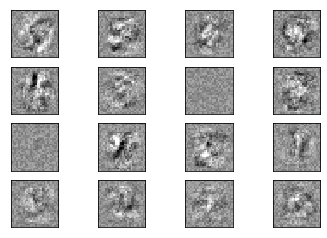

In [117]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

### The Parameter alpha

A comparison of different values for regularization parameter ‘alpha’ on synthetic datasets. The plot shows that different alphas yield different decision functions.

Alpha is a parameter for regularization term, aka penalty term, that combats overfitting by constraining the size of the weights. Increasing alpha may fix high variance (a sign of overfitting) by encouraging smaller weights, resulting in a decision boundary plot that appears with lesser curvatures. Similarly, decreasing alpha may fix high bias (a sign of underfitting) by encouraging larger weights, potentially resulting in a more complicated decision boundary.

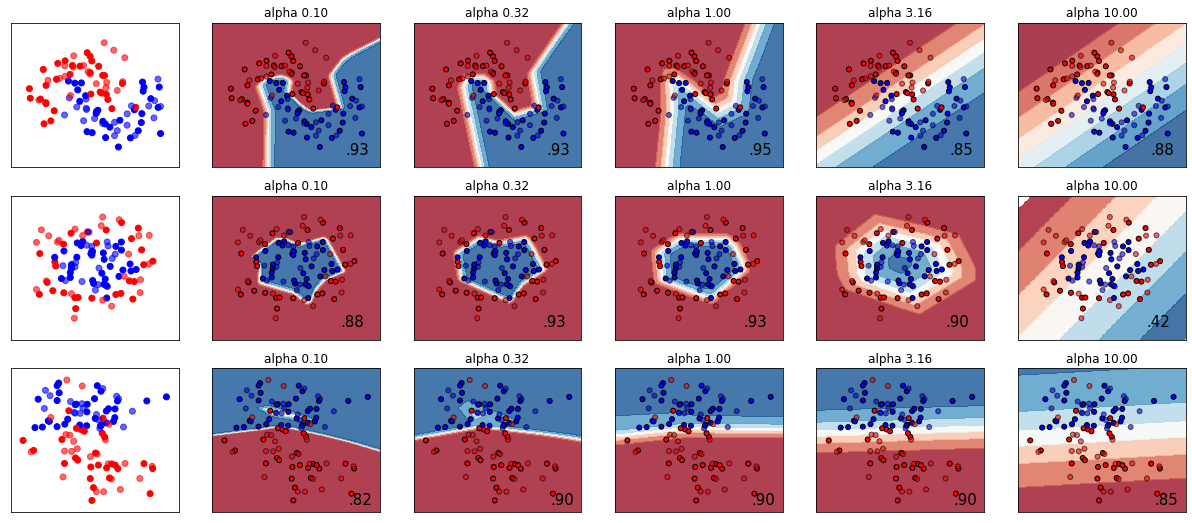

In [145]:
# Author: Issam H. Laradji
# License: BSD 3 clause
# code from: https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

h = .02  # step size in the mesh

alphas = np.logspace(-1, 1, 5)

classifiers = []
names = []
for alpha in alphas:
    classifiers.append(make_pipeline(
        StandardScaler(),
        MLPClassifier(
            solver='lbfgs', alpha=alpha, random_state=1, max_iter=2000,
            early_stopping=True, hidden_layer_sizes=[100, 100],
        )
    ))
    names.append(f"alpha {alpha:.2f}")

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
    # split into training and test part
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max] x [y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='black', s=25)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6, edgecolors='black', s=25)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()


### Exercises

#### Exercise 1

Classify the data in ["strange_flowers.txt"](data/strange_flowers.txt) with a k nearest neighbor classifier.

### Solutions

#### Solution to Exercise 1

We use `read_csv` of the pandas module to read in the `strange_flowers.txt` file:

In [146]:
import pandas as pd

dataset = pd.read_csv("data/strange_flowers.txt", 
                      header=None, 
                      names=["red", "green", "blue", "size", "label"],
                      sep=" ")
dataset

,red,green,blue,size,label
0,238.0,104.0,8.0,3.65,1.0
1,235.0,114.0,9.0,4.00,1.0
2,252.0,93.0,9.0,3.71,1.0
3,242.0,116.0,9.0,3.67,1.0
4,251.0,117.0,15.0,3.49,1.0
...,...,...,...,...,...
790,0.0,248.0,98.0,3.03,4.0
791,0.0,253.0,106.0,2.85,4.0
792,0.0,250.0,91.0,3.39,4.0
793,0.0,248.0,99.0,3.10,4.0


The first four columns contain the data and the last column contains the labels:

In [147]:
data = dataset.drop('label', axis=1)
labels = dataset.label
X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    labels, 
                                                    random_state=0, 
                                                    test_size=0.2) 


We have to scale the data now to reduce the biases between the data:

In [149]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) #  transform
X_test = scaler.transform(X_test) #  transform

In [156]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, ), 
                    max_iter=480, 
                    alpha=1e-4,
                    solver='sgd', 
                    tol=1e-4, 
                    random_state=1,
                    learning_rate_init=.1)


mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.971698
Test set score: 0.981132
